<a href="https://colab.research.google.com/github/Saipriya0407/CSD-B-67J2/blob/master/Customer_Lifetime_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
np.random.seed(42)
n_customers = 500

data = pd.DataFrame({
    'CustomerID': range(1, n_customers + 1),
    'Recency': np.random.randint(1, 365, n_customers),
    'Frequency': np.random.randint(1, 50, n_customers),
    'Monetary': np.random.randint(100, 10000, n_customers),
    'Tenure': np.random.randint(30, 365*5, n_customers)
})

print("Sample Data:")
print(data.head())


Sample Data:
   CustomerID  Recency  Frequency  Monetary  Tenure
0           1      103         49      6416    1570
1           2      349         28      6569      83
2           3      271         32      9433    1100
3           4      107         27      9015     756
4           5       72         20       324     718


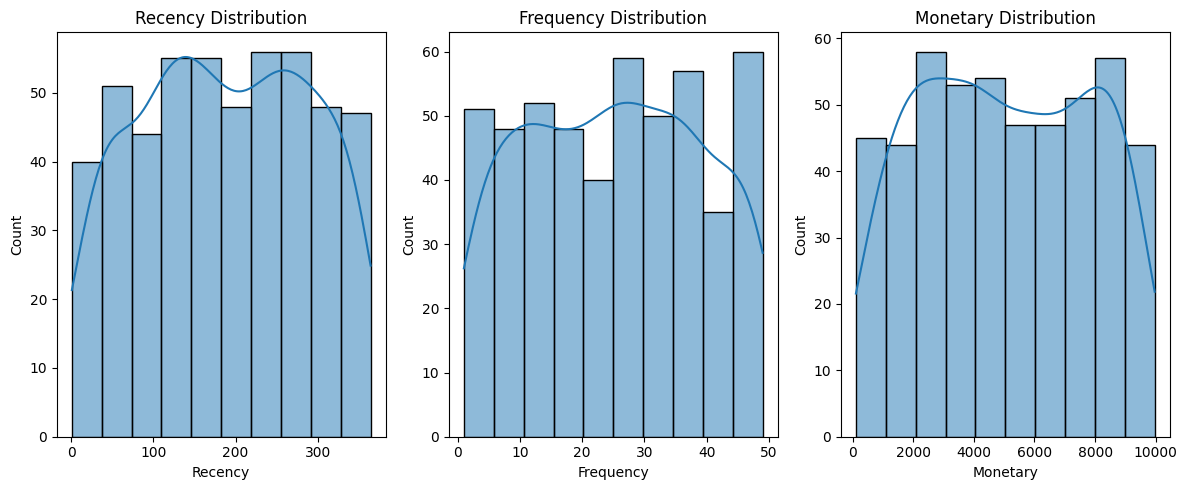

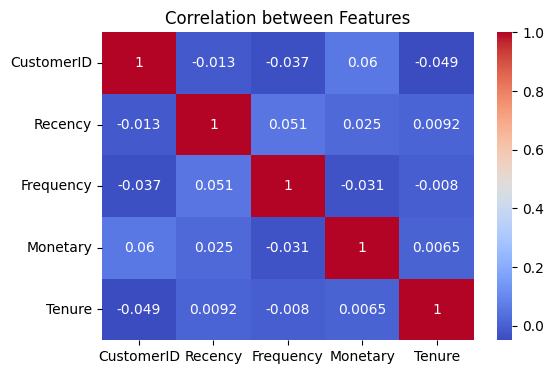

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.histplot(data['Recency'], kde=True)
plt.title('Recency Distribution')

plt.subplot(1,3,2)
sns.histplot(data['Frequency'], kde=True)
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
sns.histplot(data['Monetary'], kde=True)
plt.title('Monetary Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()


In [ ]:
X = data[['Recency', 'Frequency', 'Tenure']]
y = data['Monetary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Model Evaluation Metrics:
RMSE: 2957.24
R^2 Score: -0.22


In [ ]:
predicted_clv = pd.DataFrame({
    'CustomerID': X_test.index,
    'Predicted_CLV': y_pred
}).sort_values(by='Predicted_CLV', ascending=False)

print("\nTop 10 Customers by Predicted CLV:")
print(predicted_clv.head(10))


Top 10 Customers by Predicted CLV:
    CustomerID  Predicted_CLV
22         280   11871.040157
59          78    8481.600784
11         194    8163.996962
41          93    7252.194757
89         278    7208.212763
8           68    7102.228332
77          69    7005.827448
90         381    6946.319464
98         438    6885.038225
23         356    6785.241865
